<a href="https://colab.research.google.com/github/sunyingjian/-Logging-related-network/blob/master/%E5%BB%B6%E5%AE%89%E6%B2%B9%E7%94%B0_%E5%B2%A9%E6%80%A7%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font size=5px color="red">✦ *Google Colab 突破90分钟自动断开:</font>
<p><font size=3px > 每60分钟自动运行代码以刷新90分钟断开限制. 打开 developer-settings (在你的浏览器) 快速健 Ctrl+Shift+I 然后按console 输入以下代码 Enter. ( mac 按 Option+Command+I)</p><b>复制以下隐藏代码粉贴在浏览器console！！不要关闭浏览器以免失效</b>

<code>function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-connect-button").click() 
}setInterval(ClickConnect,6000)</code>

In [ ]:
#@markdown <h3>← 输入了代码后运行以防止断开</h>


import IPython
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Click colab-connect-button"); 
     btn.click() 
     }
   
   btn = document.getElementById('ok')
   if (btn != null){
     console.log("Click reconnect"); 
     btn.click() 
     }
  }
  
setInterval(ClickConnect,60000)
'''))

print("Done.")

<IPython.core.display.Javascript object>

Done.


In [ ]:
! git clone https://github.com/sunyingjian/numpy-.git

Cloning into 'numpy-'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
path = "/content/numpy-/3345train data.csv"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
! git clone https://github.com/sunyingjian/Machine-Learning-From-Scratch.git

Cloning into 'Machine-Learning-From-Scratch'...
remote: Enumerating objects: 287, done.
remote: Total 287 (delta 0), reused 0 (delta 0), pack-reused 287
Receiving objects: 100% (287/287), 91.24 KiB | 4.34 MiB/s, done.
Resolving deltas: 100% (133/133), done.


In [ ]:
%matplotlib inline
#%matplotlib inline 可以在Ipython编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步。
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
set_option("display.max_rows", 10)#设置要显示的默认行数，显示的最大行数是10
pd.options.mode.chained_assignment = None #为了在增加列表行数的时候防止出现setting with copy warning
filename = 'facies_vectors.csv'
training_data = pd.read_csv('/content/numpy-/3345train data.csv')
training_data
testing_data = pd.read_csv('/content/numpy-/3345test_data.csv')
testing_data

,AC,CAL,GR,K,RD,SP,Core Lithology
0,0.038756,0.026970,0.094776,0.112543,0.001420,0.614504,5
1,0.347382,0.090194,0.145150,0.202335,0.002744,0.339568,7
2,0.218400,0.059510,0.252165,0.711295,0.003874,0.918567,3
3,0.366064,0.082147,0.149304,0.201731,0.003290,0.343180,7
4,0.291877,0.079981,0.141782,0.289309,0.003455,0.344605,7
...,...,...,...,...,...,...,...
361,0.016947,0.138827,0.118400,0.358567,0.281687,0.302936,6
362,0.131043,0.069016,0.029354,0.060197,0.282093,0.253809,3
363,0.036182,0.032010,0.030090,0.071069,0.359737,0.435486,5
364,0.014562,0.127332,0.035014,0.178579,0.803566,0.311641,6


##训练集的处理

In [ ]:
# 1=粗砂岩  2=中砂岩   3=细砂岩
# 4=粉砂岩 5=白云岩 6=石灰岩 7=泥岩
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1']

facies_labels = ['CS', 'MS', 'FS', 'SS', 'DM',
                 'LS', 'MDS']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]
training_data.describe()

,AC,CAL,GR,K,RD,SP,Core Lithology
count,3.345000e+03,3.345000e+03,3.345000e+03,3.345000e+03,3.345000e+03,3345.000000,3345.000000
mean,2.107992e-01,1.450162e-01,1.662901e-01,3.464980e-01,4.917120e-02,0.418110,4.221525
std,1.099814e-01,1.353280e-01,1.036918e-01,1.808527e-01,8.719010e-02,0.196548,2.079667
min,1.000000e-07,1.000000e-08,1.000000e-07,1.000000e-07,1.000000e-09,-0.062739,1.000000
25%,1.594008e-01,5.225926e-02,8.778840e-02,2.079726e-01,1.270254e-02,0.325241,2.000000
50%,2.124234e-01,9.779821e-02,1.520483e-01,3.352124e-01,2.403313e-02,0.384527,4.000000
75%,2.574892e-01,1.850738e-01,2.359244e-01,4.811758e-01,4.815465e-02,0.439047,7.000000
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,7.000000


#测试集的处理

In [ ]:
# 1=粗砂岩  2=中砂岩   3=细砂岩
# 4=粉砂岩 5=白云岩 6=石灰岩 7=泥岩
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1']

facies_labels = ['CS', 'MS', 'FS', 'SS', 'DM',
                 'LS', 'MDS']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]
testing_data.describe()

,AC,CAL,GR,K,RD,SP,Core Lithology
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,0.214074,0.148747,0.147995,0.330942,0.046567,0.389129,4.215847
std,0.108781,0.144160,0.087543,0.181384,0.080542,0.196271,2.072619
min,0.003611,0.007118,0.005029,0.025971,0.001420,-0.061365,1.000000
25%,0.162638,0.052989,0.079442,0.194786,0.012828,0.317109,2.000000
50%,0.215371,0.098682,0.132807,0.302396,0.022275,0.379000,4.000000
75%,0.269240,0.179492,0.217013,0.456563,0.047410,0.435390,7.000000
max,0.713160,0.994694,0.483319,0.994363,0.891134,0.997070,7.000000


##画个图

CS     194
MS     710
FS     751
SS     166
DM     482
LS     114
MDS    928
Name: Core Lithology, dtype: int64

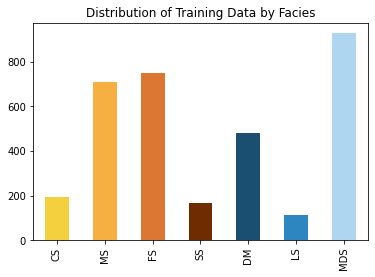

In [ ]:
#count the number of unique entries for each facies, sort them by facies number (instead of by number of entries)
#计算每个相的唯一条目数，然后按相数（而不是条目数）对它们进行排序
facies_counts = training_data['Core Lithology'].value_counts().sort_index()
#use facies labels to index each count
#使用相标签索引每个计数
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

##继续处理数据

In [ ]:
correct_facies_labels = training_data['Core Lithology'].values
correct_facies_labels_test = testing_data['Core Lithology'].values
feature_vectors = training_data.drop(['Core Lithology'], axis=1)
feature_vectors_test = testing_data.drop(['Core Lithology'], axis=1)
feature_vectors.describe()
feature_vectors_test.describe()

,AC,CAL,GR,K,RD,SP
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,0.214074,0.148747,0.147995,0.330942,0.046567,0.389129
std,0.108781,0.144160,0.087543,0.181384,0.080542,0.196271
min,0.003611,0.007118,0.005029,0.025971,0.001420,-0.061365
25%,0.162638,0.052989,0.079442,0.194786,0.012828,0.317109
50%,0.215371,0.098682,0.132807,0.302396,0.022275,0.379000
75%,0.269240,0.179492,0.217013,0.456563,0.047410,0.435390
max,0.713160,0.994694,0.483319,0.994363,0.891134,0.997070


Scikit includes a [preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html) module that can 'standardize' the data (giving each variable zero mean and unit variance, also called *whitening*).  Many machine learning algorithms assume features will be standard normally distributed data (ie: Gaussian with zero mean and unit variance).  The factors used to standardize the training set must be applied to any subsequent feature set that will be input to the classifier.  The `StandardScalar` class can be fit to the training set, and later used to standardize any training data.

Scikit包含一个预处理模块，可以“标准化”数据（赋予每个变量零均值和单位方差，也称为白化）。 许多机器学习算法都假定特征将是标准的正态分布数据（即：均值和单位方差为零的高斯）。 用于标准化训练集的因素必须应用于将输入到分类器的任何后续功能集中。 StandardScalar类可以适合于训练集，并在以后用于标准化任何训练数据。

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)
scaler_test = preprocessing.StandardScaler().fit(feature_vectors_test)
scaled_features_test = scaler.transform(feature_vectors_test)

In [ ]:
feature_vectors

,AC,CAL,GR,K,RD,SP
0,0.029102,0.031789,0.026724,0.202335,0.078986,0.333754
1,0.032883,0.033469,0.030592,0.203141,0.076064,0.333669
2,0.034385,0.037006,0.032359,0.200121,0.074503,0.333619
3,0.243816,0.143381,0.086581,0.290115,0.017649,0.094025
4,0.248043,0.146786,0.084643,0.283874,0.017286,0.090554
...,...,...,...,...,...,...
3340,0.012092,0.067866,0.007657,0.077713,0.181798,0.348797
3341,0.011831,0.069989,0.007606,0.081135,0.206839,0.348560
3342,0.011533,0.070121,0.009591,0.081337,0.250115,0.348470
3343,0.008903,0.069325,0.010596,0.081135,0.281774,0.348340


In [ ]:
feature_vectors_test

,AC,CAL,GR,K,RD,SP
0,0.038756,0.026970,0.094776,0.112543,0.001420,0.614504
1,0.347382,0.090194,0.145150,0.202335,0.002744,0.339568
2,0.218400,0.059510,0.252165,0.711295,0.003874,0.918567
3,0.366064,0.082147,0.149304,0.201731,0.003290,0.343180
4,0.291877,0.079981,0.141782,0.289309,0.003455,0.344605
...,...,...,...,...,...,...
361,0.016947,0.138827,0.118400,0.358567,0.281687,0.302936
362,0.131043,0.069016,0.029354,0.060197,0.282093,0.253809
363,0.036182,0.032010,0.030090,0.071069,0.359737,0.435486
364,0.014562,0.127332,0.035014,0.178579,0.803566,0.311641


##导入本地模块

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

In [ ]:
X_train = scaled_features
X_test = scaled_features_test
y_train = correct_facies_labels
y_test = correct_facies_labels_test

##SVM开始了


In [ ]:
from sklearn import svm

clf = svm.SVC()

现在我们可以使用上面创建的训练集来训练分类器。

In [ ]:
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

现在一直在训练我们的数据模型,我们可以用它来预测相的特征向量在测试集。因为我们知道的真实相标签向量在测试集,我们可以用结果来评估分类的准确性。

In [ ]:
predicted_labels = clf.predict(X_test)

We need some metrics to evaluate how good our classifier is doing.  A [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) is a table that can be used to describe the performance of a classification model.  [Scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) allows us to easily create a confusion matrix by supplying the actual and predicted facies labels.

The confusion matrix is simply a 2D array.  The entries of confusion matrix `C[i][j]` are equal to the number of observations predicted to have facies `j`, but are known to have facies `i`.  

To simplify reading the confusion matrix, a function has been written to display the matrix along with facies labels and various error metrics.  See the file `classification_utilities.py` in this repo for the `display_cm()` function.

我们需要一些指标来评估分类器的效果。 混淆矩阵是可用于描述分类模型性能的表。 Scikit-learn通过提供实际和预测的相貌标签，使我们能够轻松创建混淆矩阵。

混淆矩阵只是2D数组。 混淆矩阵C [i] [j]的条目等于预测具有相j的观测次数，但已知具有相i。

为了简化读取混淆矩阵，已编写了一个函数来显示矩阵以及相标和各种错误度量。 有关display_cm（）函数，请参见此存储库中的文件category_utilities.py。

这里需要导入一个py模块具体方法如下：

In [ ]:
from sklearn.metrics import confusion_matrix
from classification_utilities import display_cm, display_adj_cm
conf = confusion_matrix(y_test, predicted_labels)
display_cm(conf, facies_labels, hide_zeros=True)

     Pred    CS    MS    FS    SS    DM    LS   MDS Total
     True
       CS    12     2     5                       1    20
       MS          54    11                      15    80
       FS           7    63           2     1     7    80
       SS           1     8     1                10    20
       DM           1     2          49           1    53
       LS                             3     9     1    13
      MDS           5    10           5          80   100


The rows of the confusion matrix correspond to the actual facies labels.  The columns correspond to the labels assigned by the classifier.  For example, consider the first row. For the feature vectors in the test set that actually have label `SS`, 23 were correctly indentified as `SS`, 21 were classified as `CSiS` and 2 were classified as `FSiS`.

混淆矩阵的行对应于实际的相图。列对应于分类器分配的标签。例如，考虑第一行。对于实际存在标签SS的测试集中的特征向量，正确识别为SS的有23个，识别为CSiS的有21个，识别为FSiS的有2个。

The entries along the diagonal are the facies that have been correctly classified.  Below we define two functions that will give an overall value for how the algorithm is performing.  The accuracy is defined as the number of correct classifications divided by the total number of classifications.

沿对角线的条目是已正确分类的相。 在下面，我们定义了两个函数，它们将为算法的执行提供总体价值。 准确度定义为正确分类的数量除以分类的总数。

In [ ]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

As noted above, the boundaries between the facies classes are not all sharp, and some of them blend into one another.  The error within these 'adjacent facies' can also be calculated.  We define an array to represent the facies adjacent to each other.  For facies label `i`, `adjacent_facies[i]` is an array of the adjacent facies labels.

如上所述，各相类型之间的界限并不都很明显，其中一些相互融合。这些“相邻相”内的误差也可以计算出来。我们定义了一个数组来表示彼此相邻的相。对于相标志i，相邻相[i]是相邻相标志的数组。

In [ ]:
def accuracy_adjacent(conf, adjacent_facies):
    nb_classes = conf.shape[0]
    total_correct = 0.
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
        for j in adjacent_facies[i]:
            total_correct += conf[i][j]
    return total_correct / sum(sum(conf))

In [ ]:
print('Facies classification accuracy = %f' % accuracy(conf))

Facies classification accuracy = 0.732240


##最佳超参数
The classifier so far has been built with the default parameters.  However, we may be able to get improved classification results with optimal parameter choices.

到目前为止，分类器是使用默认参数构建的。然而，我们可能会得到改进的分类结果与最佳参数的选择。

We will consider two parameters.  The parameter `C` is a regularization factor, and tells the classifier how much we want to avoid misclassifying training examples.  A large value of C will try to correctly classify more examples from the training set, but if `C` is too large  it may 'overfit' the data and fail to generalize when classifying new data. If `C` is too small then the model will not be good at fitting outliers and will have a large error on the training set.

我们将考虑两个参数。 参数“ C”是一个正则化因子，它告诉分类器我们要避免对训练样本进行错误分类的程度。 较大的C值会尝试从训练集中正确分类更多示例，但是如果C值太大，则可能会“拟合”数据，并且在分类新数据时无法归纳。 如果C太小，则模型将无法很好地拟合离群值，并且训练集上的误差会很大。

The SVM learning algorithm uses a kernel function to compute the distance between feature vectors.  Many kernel functions exist, but in this case we are using the radial basis function `rbf` kernel (the default).  The `gamma` parameter describes the size of the radial basis functions, which is how far away two vectors in the feature space need to be to be considered close.

支持向量机学习算法利用核函数计算特征向量之间的距离。存在许多内核函数，但在本例中，我们使用径向基函数“rbf”内核(默认值)。参数描述径向基函数的大小，也就是特征空间中两个向量需要被认为是接近的距离。

We will train a series of classifiers with different values for `C` and `gamma`.  Two nested loops are used to train a classifier for every possible combination of values in the ranges specified.  The classification accuracy is recorded for each combination of parameter values.  The results are shown in a series of plots, so the parameter values that give the best classification accuracy on the test set can be selected.

我们将针对“ C”和“ gamma”训练一系列具有不同值的分类器。 两个嵌套循环用于为指定范围内值的每种可能组合训练分类器。 记录每个参数值组合的分类精度。 结果显示在一系列图中，因此可以选择在测试集上提供最佳分类精度的参数值。

This process is also known as 'cross validation'.  Often a separate 'cross validation' dataset will be created in addition to the training and test sets to do model selection.  For this tutorial we will just use the test set to choose model parameters.

这个过程也被称为“交叉验证”。通常，除了用于进行模型选择的培训和测试集之外，还会创建一个单独的“交叉验证”数据集。在本教程中，我们将使用测试集来选择模型参数。

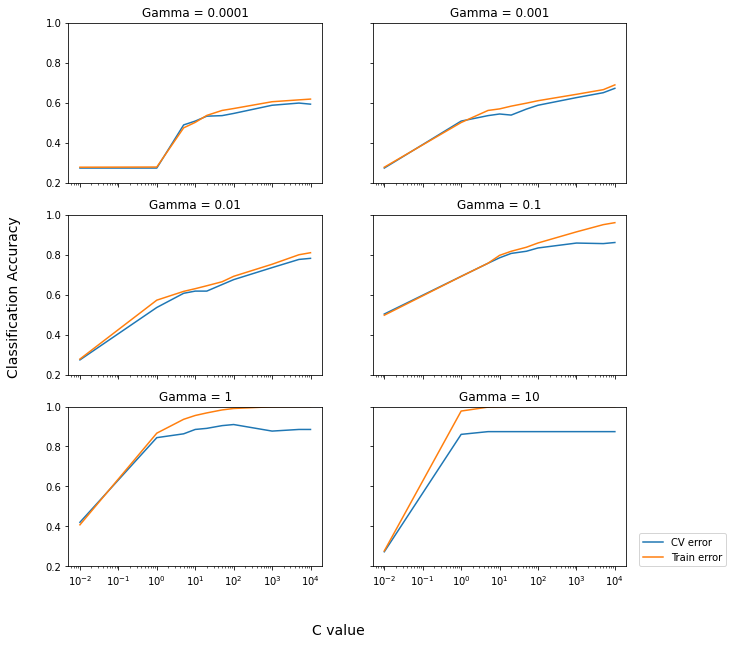

In [ ]:
#model selection takes a few minutes, change this variable
#to true to run the parameter loop
do_model_selection = True

if do_model_selection:
    C_range = np.array([.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000])
    gamma_range = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10])
    
    fig, axes = plt.subplots(3, 2, 
                        sharex='col', sharey='row',figsize=(10,10))
    plot_number = 0
    for outer_ind, gamma_value in enumerate(gamma_range):
        row = int(plot_number / 2)
        column = int(plot_number % 2)
        cv_errors = np.zeros(C_range.shape)
        train_errors = np.zeros(C_range.shape)
        for index, c_value in enumerate(C_range):
            
            clf = svm.SVC(C=c_value, gamma=gamma_value)
            clf.fit(X_train,y_train)
            
            train_conf = confusion_matrix(y_train, clf.predict(X_train))
            cv_conf = confusion_matrix(y_test, clf.predict(X_test))
        
            cv_errors[index] = accuracy(cv_conf)
            train_errors[index] = accuracy(train_conf)

        ax = axes[row, column]
        ax.set_title('Gamma = %g'%gamma_value)
        ax.semilogx(C_range, cv_errors, label='CV error')
        ax.semilogx(C_range, train_errors, label='Train error')
        plot_number += 1
        ax.set_ylim([0.2,1])
        
    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
    fig.text(0.5, 0.03, 'C value', ha='center',
             fontsize=14)
             
    fig.text(0.04, 0.5, 'Classification Accuracy', va='center', 
             rotation='vertical', fontsize=14)

The best accuracy on the cross validation error curve was achieved for `gamma = 1`, and `C = 10`.  We can now create and train an optimized classifier based on these parameters:

在gamma = 1和C = 10时，交叉验证误差曲线的精度最佳。现在，我们可以根据这些参数创建和训练一个优化的分类器

In [ ]:
clf = svm.SVC(C=10, gamma=1)        
clf.fit(X_train, y_train)

cv_conf = confusion_matrix(y_test, clf.predict(X_test))

print('Optimized facies classification accuracy = %.2f' % accuracy(cv_conf))
print(f'准确率{accuracy(cv_conf)}')

Optimized facies classification accuracy = 0.89
准确率0.8852459016393442


[Precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall) are metrics that give more insight into how the classifier performs for individual facies.  Precision is the probability that given a classification result for a sample, the sample actually belongs to that class.  Recall is the probability that a sample will be correctly classified for a given class.

Precision and recall can be computed easily using the confusion matrix.  The code to do so has been added to the `display_confusion_matrix()` function:

精度和回忆度是能够更深入地了解分类器对单个相的执行情况的指标。精度是给定一个样本的分类结果，这个样本实际上属于这个类别的概率。召回率是样本将被正确分类为给定类的概率。使用混淆矩阵可以很容易地计算出精确度和查全率。这样做的代码已经添加到display confusion matrix()函数中

In [ ]:
display_cm(cv_conf, facies_labels, 
           display_metrics=True, hide_zeros=True)

     Pred    CS    MS    FS    SS    DM    LS   MDS Total
     True
       CS    17     1                             2    20
       MS          67     5                       8    80
       FS           1    75     2                 2    80
       SS           1     2    16                 1    20
       DM                            51           2    53
       LS                                  13          13
      MDS           7     6     2                85   100

Precision  1.00  0.87  0.85  0.80  1.00  1.00  0.85  0.89
   Recall  0.85  0.84  0.94  0.80  0.96  1.00  0.85  0.89
       F1  0.92  0.85  0.89  0.80  0.98  1.00  0.85  0.89
